In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

### Puzzle part count vs. accuracy - Resnet18 vs. PCVT

In [2]:
part_count_x = [0,4,8,14,28,56]
part_count = [x * x for x in part_count_x]

image_size_x = 224
part_size_x = [image_size_x / x if x>0 else image_size_x  for x in part_count_x]

accuracy_resnet = [0.9778, 0.9315, 0.9249, 0.9021, 0.8083, 0.6933]
accuracy_cpvt = [0.9877, 0.9938, 0.9805, 0.9745, 0.9349, 0.8564]


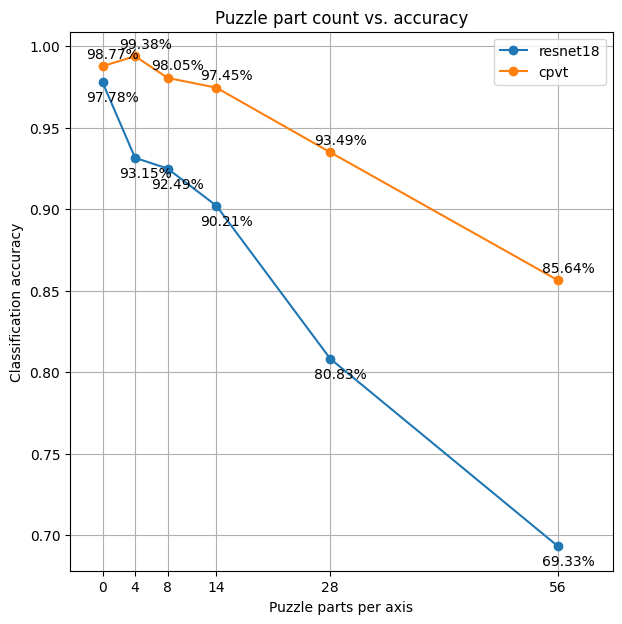

In [3]:
x_axis = part_count_x
# x_axis = part_count

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x_axis, accuracy_resnet, marker='o', label='resnet18')
ax.plot(x_axis, accuracy_cpvt, marker='o', label='cpvt')

ax.set_title('Puzzle part count vs. accuracy')
ax.set_xlabel('Puzzle parts per axis')
ax.set_ylabel('Classification accuracy')

ax.set_xticks(x_axis)

for index in range(len(part_count_x)):
  ax.text(x_axis[index]-2, accuracy_resnet[index]- 0.012 , str(np.round(accuracy_resnet[index]*100, 2)) + '%', size=10)

for index in range(len(part_count_x)):
  ax.text(x_axis[index]-2, accuracy_cpvt[index] + 0.005, str(np.round(accuracy_cpvt[index]*100, 2)) + '%', size=10)

ax.set_xlim(xmin = -4, xmax=max(x_axis) * 1.12)

# ax.set_xscale('symlog')


plt.grid()
ax.legend()

### CPVT with frozen positional embedding layer vs. finetuned positional embedding

In [4]:
from pathlib import Path
pcvt_28_frozen_path = Path('data/pcpvt/train_log_28x28_frozen.csv')
pcvt_28_learned_path = Path('data/pcpvt/train_log_28x28.csv')

frozen = pd.read_csv(pcvt_28_frozen_path, delimiter='\t')
learned = pd.read_csv(pcvt_28_learned_path, delimiter='\t')


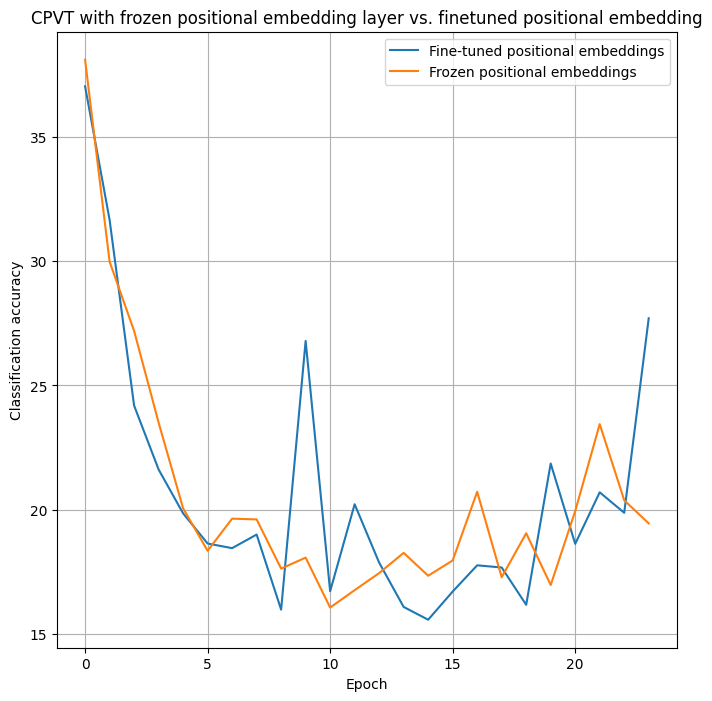

In [5]:
vals_to_show = 24

y_learned = learned['validation_loss']
y_frozen = frozen['validation_loss']

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(learned['epoch'][:vals_to_show], y_learned[:vals_to_show], label='Fine-tuned positional embeddings')
ax.plot(frozen['epoch'][:vals_to_show], y_frozen[:vals_to_show], label='Frozen positional embeddings')

ax.set_title('CPVT with frozen positional embedding layer vs. finetuned positional embedding')
ax.set_xlabel('Epoch')
ax.set_ylabel('Classification accuracy')

plt.grid()
ax.legend()

### Patch Adjacence accuracy vs patch size / num patches

In [6]:
part_count_x = [4,8,14,28,56]
part_count = [x * x for x in part_count_x]

image_size_x = 448
part_size_x = [image_size_x / x if x>0 else image_size_x  for x in part_count_x]

accuracy_resnet = [0.9936, 0.9868, 0.9810, 0.9614, 0.8773]


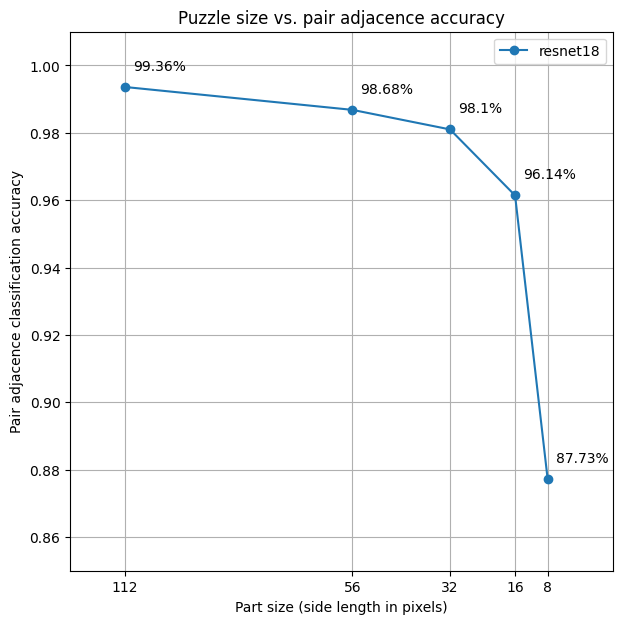

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = part_size_x
# x_axis = part_count

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x_axis, accuracy_resnet, marker='o', label='resnet18')

ax.set_title('Puzzle size vs. pair adjacence accuracy')
ax.set_xlabel('Part size (side length in pixels)')
ax.set_ylabel('Pair adjacence classification accuracy')

ax.set_xticks(x_axis)

for index in range(len(part_count_x)):
  ax.text(x_axis[index]-2, accuracy_resnet[index]+ 0.005 , str(np.round(accuracy_resnet[index]*100, 2)) + '%', size=10)

ax.set_xlim(xmin = -8, xmax=max(x_axis) * 1.12)
ax.set_ylim(ymin = 0.85, ymax=1.01)

# ax.set_xscale('symlog')
plt.gca().invert_xaxis()

plt.grid()
ax.legend()

In [8]:
2, 2**2, 4**2, 

(2, 4, 16)

### Perm hardness


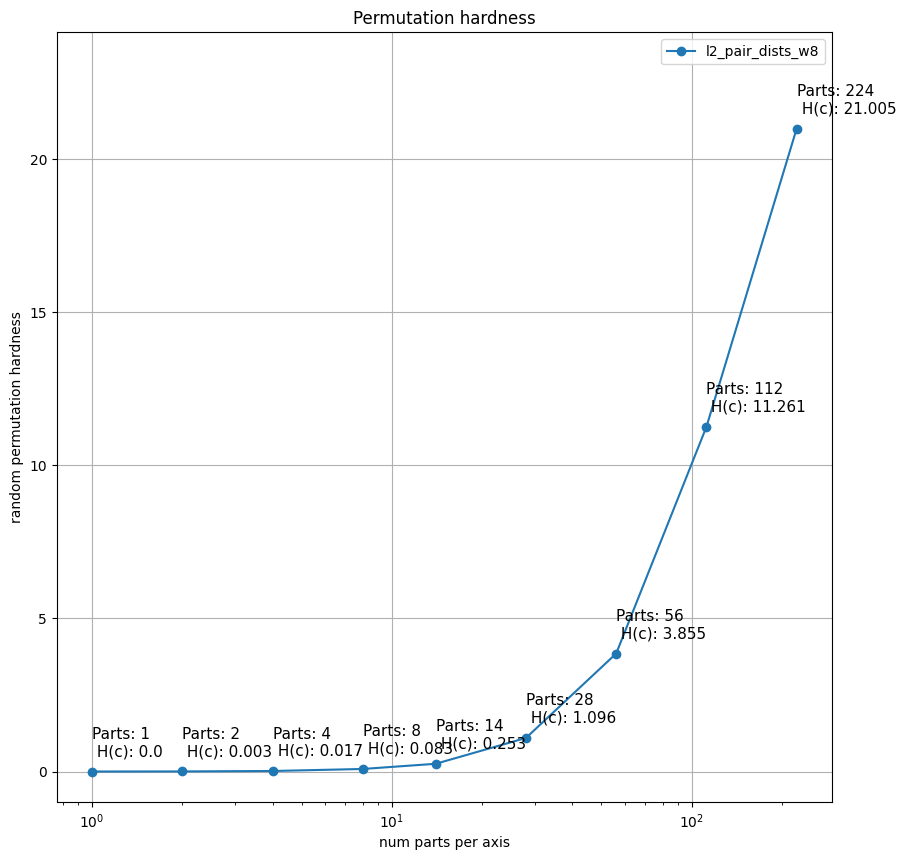

In [9]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file = Path('data/perm_hardness_table_new.csv')
df = pd.read_csv(file).sort_values('parts')

x_axis = df['parts']
plots = [ 'l2_pair_dists_w8']

zoom=1e10
pow=2
fig, ax = plt.subplots(figsize=(10,10))

for name in plots:
    y_plot = df[name] **pow *zoom
    ax.plot(x_axis, y_plot, marker='o', label=name)

    for index in range(len(x_axis)):
      ax.text(x_axis[index],  y_plot[index] + 0.5 , f'Parts: {int(x_axis[index])}\n H(c): {np.round(y_plot[index], 3)}', size=11)

    
ax.set_title('Permutation hardness')
ax.set_xlabel('num parts per axis')
ax.set_ylabel('random permutation hardness')

ax.set_xticks(ticks=x_axis, labels=x_axis)
# ax.set_xlim(xmin = -4, xmax=1000)
ax.set_ylim(ymin = min(y_plot)-1, ymax=max(y_plot) * 1.15)
# plt.gca().invert_xaxis()

ax.set_xscale('log')


plt.grid()
ax.legend()

#### Hardness, on a linear scale

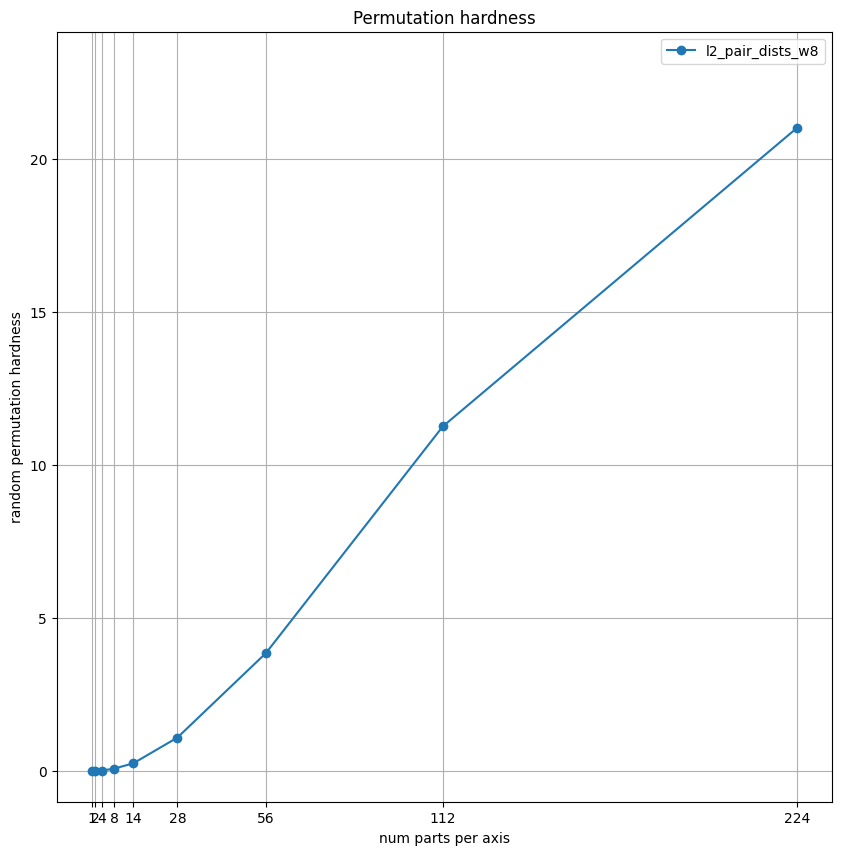

In [10]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file = Path('data/perm_hardness_table_new.csv')
df = pd.read_csv(file).sort_values('parts')

x_axis = df['parts']
plots = [ 'l2_pair_dists_w8']

zoom=1e10
pow=2
fig, ax = plt.subplots(figsize=(10,10))

for name in plots:
    y_plot = df[name] **pow *zoom
    ax.plot(x_axis, y_plot, marker='o', label=name)

    # for index in range(len(x_axis)):
    #   ax.text(x_axis[index],  y_plot[index] + 0.5 , f'Parts: {int(x_axis[index])}\n H(c): {np.round(y_plot[index], 2)}', size=11)

    
ax.set_title('Permutation hardness')
ax.set_xlabel('num parts per axis')
ax.set_ylabel('random permutation hardness')

ax.set_xticks(ticks=x_axis, labels=x_axis)
# ax.set_xlim(xmin = -4, xmax=1000)
ax.set_ylim(ymin = min(y_plot)-1, ymax=max(y_plot) * 1.15)
# plt.gca().invert_xaxis()

# ax.set_xscale('log')


plt.grid()
ax.legend()

In [11]:
df

,Unnamed: 0,parts,part_size,l1_pair_dists,l2_pair_dists,linf_pair_dists,l1_pair_dists_w,l2_pair_dists_w,linf_pair_dists_w,l1_pair_dists_w2,...,linf_pair_dists_w2,l1_pair_dists_w4,l2_pair_dists_w4,linf_pair_dists_w4,l1_pair_dists_w8,l2_pair_dists_w8,linf_pair_dists_w8,l1_pair_dists_w16,l2_pair_dists_w16,linf_pair_dists_w16
2,0,1,224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0,0,2,112,168.003348,118.796307,84.001674,1.472445,1.041176,0.736223,0.018423,...,0.009212,0.000057,0.000040,0.000028,7.810861e-07,5.523113e-07,3.905431e-07,7.810861e-07,5.523113e-07,3.905431e-07
1,0,4,56,195.128889,155.898797,141.752825,1.889023,1.499849,1.356810,0.028212,...,0.020050,0.000118,0.000092,0.000083,1.650279e-06,1.292652e-06,1.158703e-06,1.650279e-06,1.292652e-06,1.158703e-06
7,0,8,28,217.168391,170.070092,151.979591,2.204932,1.732001,1.549940,0.039419,...,0.027787,0.000251,0.000198,0.000177,3.655618e-06,2.883637e-06,2.580917e-06,3.655618e-06,2.883637e-06,2.580917e-06
3,0,14,16,207.837545,163.357971,146.961696,2.235405,1.754598,1.575237,0.046495,...,0.032679,0.000418,0.000329,0.000296,6.376542e-06,5.026190e-06,4.522541e-06,6.376542e-06,5.026190e-06,4.522541e-06
6,0,28,8,210.187290,164.717685,147.865010,2.306190,1.806677,1.620806,0.055647,...,0.039075,0.000796,0.000624,0.000559,1.336139e-05,1.047018e-05,9.383078e-06,1.336139e-05,1.047018e-05,9.383078e-06
4,0,56,4,208.493884,163.244737,146.476565,2.322275,1.818130,1.630860,0.061875,...,0.043372,0.001298,0.001015,0.000909,2.509576e-05,1.963326e-05,1.757245e-05,2.509576e-05,1.963326e-05,1.757245e-05
8,0,112,2,207.623253,162.460267,145.694741,2.329203,1.822584,1.634143,0.065823,...,0.046101,0.001839,0.001438,0.001287,4.292731e-05,3.355801e-05,3.002016e-05,4.292731e-05,3.355801e-05,3.002016e-05
5,0,224,1,208.791082,163.469095,146.690284,2.340506,1.832015,1.643187,0.067574,...,0.047341,0.002191,0.001714,0.001534,5.860135e-05,4.583116e-05,4.101549e-05,5.860135e-05,4.583116e-05,4.101549e-05


### comparison - Modeled permutation hardness vs. model accuracies

In [19]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Prediction data
part_count_x = [1,4,8,14,28,56]

image_size_x = 224
part_size_x = [image_size_x / x if x>0 else image_size_x  for x in part_count_x]

accuracy_resnet = [0.9778, 0.9315, 0.9249, 0.9021, 0.8083, 0.6933]
accuracy_cpvt = [0.9877, 0.9938, 0.9805, 0.9745, 0.9349, 0.8564]

# --- Hardness data
file = Path('data/perm_hardness_table_new.csv')
df = pd.read_csv(file).sort_values('parts')

x_axis = df['parts']
hardness_config = [ 'l2_pair_dists_w8']
zoom=1e10
pow=2

df['prediction_by_hardness'] = df['l2_pair_dists_w8'] **pow *zoom
normalizing_factor = max(df['prediction_by_hardness'])
df['prediction_by_hardness'] = 1 - df['prediction_by_hardness'] / normalizing_factor
df = df[df['parts'].isin(part_count_x)]
prediction_by_hardness = list(df['prediction_by_hardness'])

prediction_by_hardness, accuracy_resnet, accuracy_cpvt

table = pd.DataFrame()
table['parts'] = part_count_x
table['Accuracy predicted by hardness function'] = prediction_by_hardness
table['Resnet accuracy'] = accuracy_resnet
table['CPVT accuracy'] = accuracy_cpvt

table


,parts,Accuracy predicted by hardness function,Resnet accuracy,CPVT accuracy
0,1,1.000000,0.9778,0.9877
1,4,0.999204,0.9315,0.9938
2,8,0.996041,0.9249,0.9805
3,14,0.987973,0.9021,0.9745
4,28,0.947810,0.8083,0.9349
5,56,0.816489,0.6933,0.8564


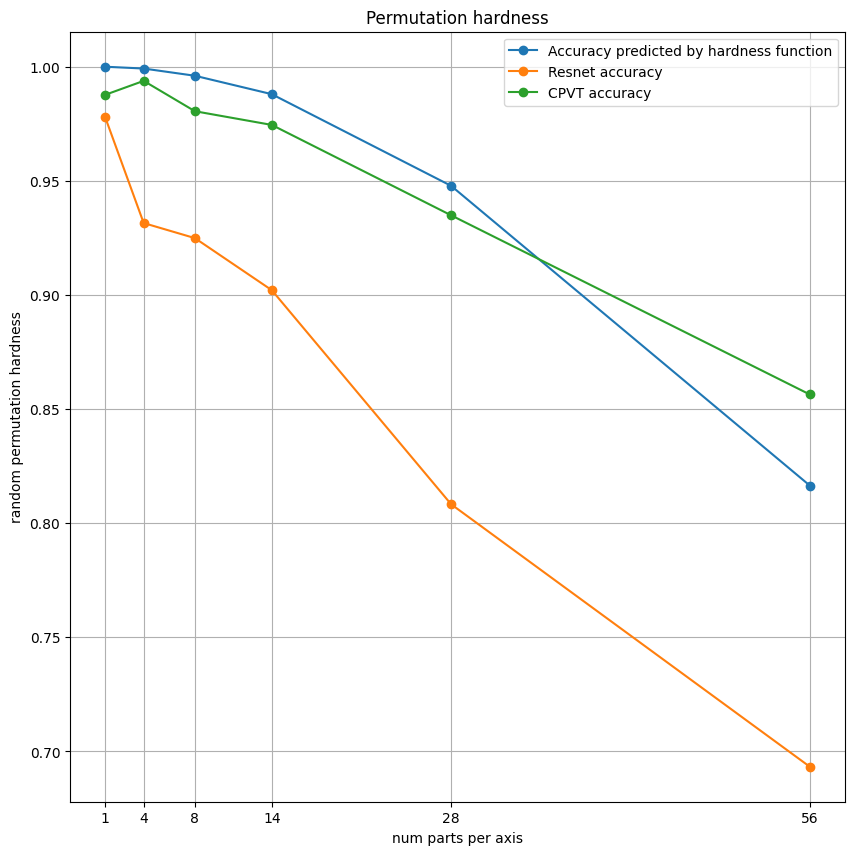

In [27]:


fig, ax = plt.subplots(figsize=(10,10))
x_axis = table['parts']
plot_names = list(table.columns)
plot_names.remove('parts')

for name in plot_names:
    y_plot = table[name]
    ax.plot(x_axis, y_plot, marker='o', label=name)
    
ax.set_title('Permutation hardness')
ax.set_xlabel('num parts per axis')
ax.set_ylabel('random permutation hardness')

ax.set_xticks(ticks=x_axis, labels=x_axis)



plt.grid()
ax.legend()